In [117]:
import pandas as pd

df_train = pd.read_csv("application_train.csv")
df_test = pd.read_csv("application_test.csv")

print("----INFO OF THE TRAIN DATASET----\n")
df_train.info()
print("---------------------------------\n")

print("----INFO OF THE TEST DATASET----\n")
df_train.info()
print("---------------------------------\n")

df_test.head(5)


----INFO OF THE TRAIN DATASET----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
---------------------------------

----INFO OF THE TEST DATASET----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
---------------------------------



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# get some ideas of how imbalanced/balanced data is 
df_train['NAME_CONTRACT_TYPE'].value_counts(normalize=True)


Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [120]:
def get_missing_values_in_set(df):
    """ get number of missing values for each column in dataframe """
    missing_values = df.isnull().sum()
    total  = missing_values.sum()
    for column, _ in missing_values.items():
        if missing_values[column] == 0:
            del missing_values[column]
    return missing_values, total
miss_val = get_missing_values_in_set(df_train)
total = miss_val[1]
print(f"Total number of missing of values in dataset {total}")
print(miss_val[0])

Total number of missing of values in dataset 9152465
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [121]:
# data cleansing 
# let's get statistc of number of missing values and drop columns that has more than 60% of missing values
def drop_col_with_missing_val(df):
    missing_values = get_missing_values_in_set(df)[0]
    n = df.shape[0]
    statistic_dict = {}
    for val, num in missing_values.items():
        statistic_dict[val] = num/n*100

    st = {"column":statistic_dict.keys(), "percentage": statistic_dict.values()}
    statistic_df = pd.DataFrame(data=st)
    columns_to_drop = []
    for col in statistic_dict.keys():
        if statistic_dict[col] > 60:
            columns_to_drop.append(col)
    
    new_df = df.drop(columns=columns_to_drop)
    return statistic_df, new_df

df_train_miss = drop_col_with_missing_val(df_train)[1]
miss_val = get_missing_values_in_set(drop_col_with_missing_val(df_train)[1])
total = miss_val[1]

print(f"Total number of missing of values in updated dataset {total}")
    

Total number of missing of values in updated dataset 5584117


In [122]:
def is_dataset_contains_duplicates(df):
    return bool(df.duplicated().sum())
        
print(is_dataset_contains_duplicates(df_train_miss))
df_test = drop_col_with_missing_val(df_test)[1]

print(is_dataset_contains_duplicates(df_test))


False
       SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  

In [108]:
#categorial features
def categorial_features(df):
    categ_dict = {"column":[], "unique values amount":[]}
    for col in df:
        if df.dtypes[col] != "object":
            continue
        a = df[col].astype("category")
        categ_dict["column"].append(col)
        categ_dict["unique values amount"].append(len(a.cat.categories))
    categ_df = pd.DataFrame(data=categ_dict)

    return categ_df
def numerical_features(df):
    num_features = []
    for col in df: 
        if df.dtypes[col] == 'float64' or df.dtypes[col] == 'int64' :
            num_features.append(col)
    return num_features
        
categ_df_test = categorial_features(df_test)
print(categ_df_test)
# def categorial_features(df):


                        column  unique values amount
0           NAME_CONTRACT_TYPE                     2
1                  CODE_GENDER                     2
2                 FLAG_OWN_CAR                     2
3              FLAG_OWN_REALTY                     2
4              NAME_TYPE_SUITE                     7
5             NAME_INCOME_TYPE                     7
6          NAME_EDUCATION_TYPE                     5
7           NAME_FAMILY_STATUS                     5
8            NAME_HOUSING_TYPE                     6
9              OCCUPATION_TYPE                    18
10  WEEKDAY_APPR_PROCESS_START                     7
11           ORGANIZATION_TYPE                    58
12              HOUSETYPE_MODE                     3
13          WALLSMATERIAL_MODE                     7
14         EMERGENCYSTATE_MODE                     2


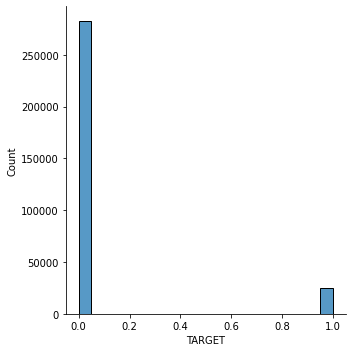

In [109]:
import seaborn as sns
sns.displot(df_train["TARGET"], kde=False)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG

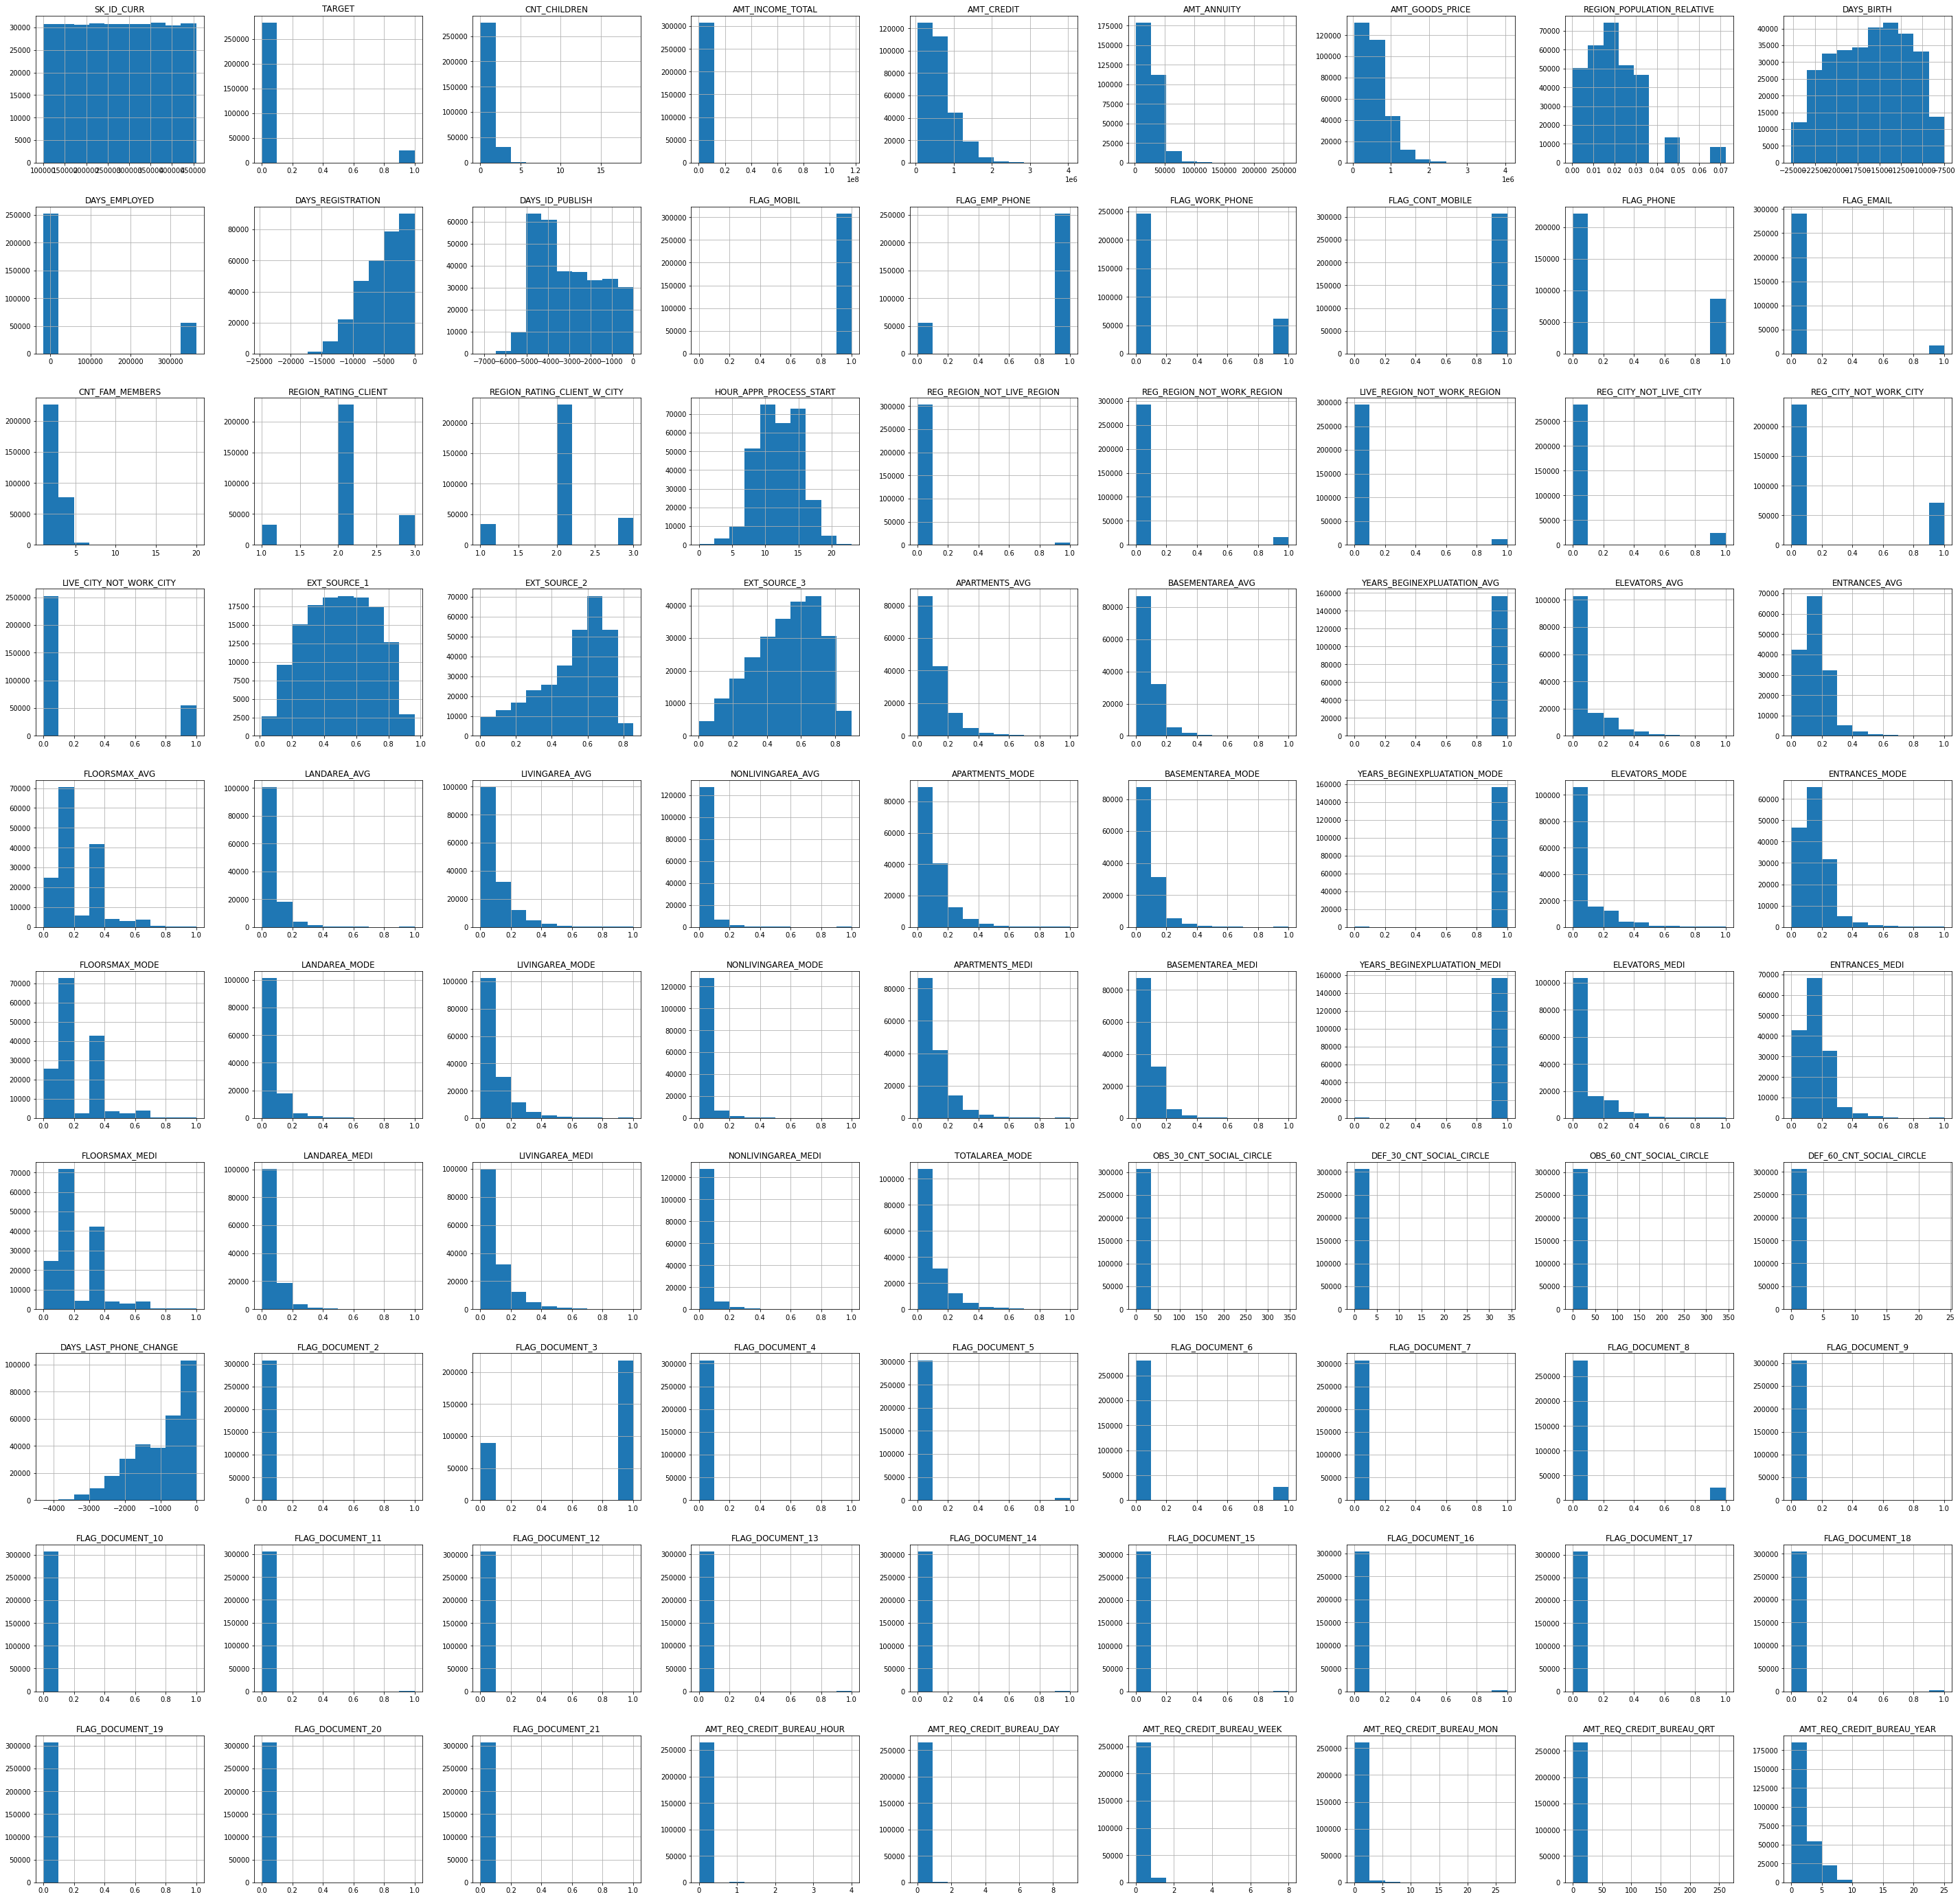

In [110]:
#df_test[list(categ_df_test["column"])].hist()
categ_feat = list(categ_df_test["column"])
print(categ_feat)
num_f = numerical_features(df_train)
df_train[num_f].hist(figsize=(50,50))



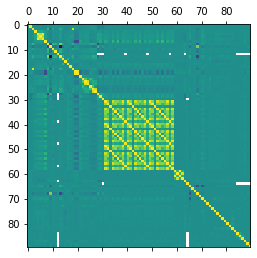

In [111]:
df_train = drop_col_with_missing_val(df_train)
df_corr = df_train[1].corr()
import matplotlib.pyplot as plt
plt.matshow(df_corr)
plt.show()

In [112]:
# preparation for classification
#in the above we can see that columns FLAG_MOBIL FLAG_CONT_MOBILE FLAG_DOCUMENT_3 FLAG_DOCUMENT_6 FLAG_DOCUMENT_8 AMT_INCOME_TOTAL can be deleted because they not so informative
# colums_to_delete = ["FLAG_MOBIL","FLAG_CONT_MOBILE","FLAG_DOCUMENT_3","FLAG_DOCUMENT_6","FLAG_DOCUMENT_8", "AMT_INCOME_TOTAL"]
# df_train.drop(columns=colums_to_delete, inplace=True)
# df_test.drop(columns=colums_to_delete, inplace=True)

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
df_train = df_train[["TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
    "AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_EMPLOYED", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY"]]
d_columns = df_train.columns
num_columns = df_train.select_dtypes(include = ['float64', 'int64']).columns
cat_columns = df_train.select_dtypes(include = ['object']).columns
transformer = ColumnTransformer(
     transformers = [
         ('numerical', StandardScaler(), num_columns.drop('TARGET')),
         ('categorical', OneHotEncoder(), cat_columns)
     ],
)
data_train = df_train.drop("TARGET", axis=1)
data_train_ = pd.DataFrame(transformer.fit_transform(data_train))
print(data_train_)
test_columns = d_columns.drop("TARGET")

data_test = df_test[test_columns]
data_test_ = pd.DataFrame(transformer.transform(data_test))
data_test_.head(-10)

TypeError: tuple indices must be integers or slices, not list

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
def PredictModel(model):
  model.fit(train_split_x, train_split_y)
  train_predictions = model.predict(train_split_x)
  validate_predictions = model.predict(validate_x)
  print("Train accuracy:", accuracy_score(train_split_y, train_predictions), "ROC_AUC: ", roc_auc_score(train_split_y, train_predictions))
  print("Validate accuracy:", accuracy_score(validate_y, validate_predictions), "ROC_AUC: ", roc_auc_score(validate_y, validate_predictions))

trainX = data_train_
trainY = df_train['TARGET']
train_split_x, validate_x, train_split_y, validate_y = train_test_split(trainX, trainY, test_size=0.2)

PredictModel(LogisticRegression(max_iter=1000))

Train.
 Accuracy: 0.9192749829273845 ROC_AUC:  0.5001126283145821
Validate.
 Accuracy: 0.9192559712534348 ROC_AUC:  0.5002843053099089
